# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
import json
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude 
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
target_url = url + weather_api_key
target_url

'http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=8f7d220f311a08002f64417cbaa0e29a'

In [4]:
weather_check = requests.get(target_url)
weather_check_json = weather_check.json()
print(weather_check_json['city']['name'])

Moscow


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cityname = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
count = 0
    
# Loop through the list of cities and perform a request for data on each

for city in cities:
    weather_check = requests.get(target_url + "&q=" + city + "&units")
    time.sleep(0.5)
    weather_check_json = weather_check.json()
    try:
        cityname.append(weather_check_json['city']['name'])
        lat.append(weather_check_json['city']['coord']['lat'])
        lng.append(weather_check_json['city']['coord']['lon'])
        max_temp.append(weather_check_json['list'][0]['main']['temp_max'])
        cloudiness.append(weather_check_json['list'][0]['clouds']['all'])
        wind_speed.append(weather_check_json['list'][0]['wind']['speed'])
        country.append(weather_check_json['city']['country'])
        date.append(weather_check_json['list'][0]['dt'])
        humidity.append(weather_check_json['list'][0]['main']['humidity'])
        count = count + 1
        print(f"Processing record {count} of Set 1 | {city}")
    except Exception as e:
        print("Record not found")
        pass
        
print("I made it through")

#this code is not turning up any answer

Processing record 1 of Set 1 | mataura
Processing record 2 of Set 1 | chemin grenier
Processing record 3 of Set 1 | arraial do cabo
Processing record 4 of Set 1 | rikitea
Record not found
Processing record 5 of Set 1 | albany
Processing record 6 of Set 1 | vaini
Processing record 7 of Set 1 | pampa
Processing record 8 of Set 1 | brae
Processing record 9 of Set 1 | hermanus
Processing record 10 of Set 1 | lata
Processing record 11 of Set 1 | carutapera
Processing record 12 of Set 1 | bluff
Processing record 13 of Set 1 | dalbandin
Processing record 14 of Set 1 | murygino
Processing record 15 of Set 1 | cap-chat
Processing record 16 of Set 1 | mar del plata
Processing record 17 of Set 1 | bredasdorp
Processing record 18 of Set 1 | camacha
Processing record 19 of Set 1 | meulaboh
Processing record 20 of Set 1 | kavaratti
Processing record 21 of Set 1 | marion
Processing record 22 of Set 1 | dikson
Processing record 23 of Set 1 | college
Processing record 24 of Set 1 | fortuna
Processing r

In [6]:
weather_data_df = pd.DataFrame({
                "City": cityname,"Latitude": lat, "Longitude":lng,"Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,
                "Wind Speed":wind_speed,"Country":country, "Date":date })
weather_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,283.97,89,97,1.70,NZ,1644699600
1,Chemin Grenier,-20.4872,57.4656,299.92,86,13,3.87,MU,1644699600
2,Arraial do Cabo,-22.9661,-42.0278,298.07,88,75,4.13,BR,1644699600
3,Rikitea,-23.1203,-134.9692,299.33,70,2,7.09,PF,1644699600
4,Albany,42.6001,-73.9662,278.27,58,57,5.00,US,1644699600


In [7]:
weather_data_df.to_csv("../output_data/weather_data.csv")
weather_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,283.97,89,97,1.70,NZ,1644699600
1,Chemin Grenier,-20.4872,57.4656,299.92,86,13,3.87,MU,1644699600
2,Arraial do Cabo,-22.9661,-42.0278,298.07,88,75,4.13,BR,1644699600
3,Rikitea,-23.1203,-134.9692,299.33,70,2,7.09,PF,1644699600
4,Albany,42.6001,-73.9662,278.27,58,57,5.00,US,1644699600


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
column = weather_data_df["Humidity"]
max_value_humidity = column.max()
max_value_humidity

100

In [26]:
#  Get the indices of cities that have humidity over 100%.

humidity_df = weather_data_df.loc("Humidity" >= "100")
humidity_df

#not able to get anything on this step - need help

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

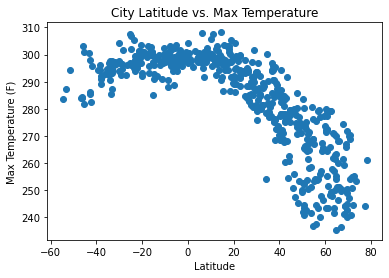

In [27]:
#Observation 1: As Latitude increases, max temperature decreases 

scatter_lat = weather_data_df["Latitude"]
scatter_temp = weather_data_df["Max Temp"]

plt.scatter(scatter_lat, scatter_temp)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

## Latitude vs. Humidity Plot

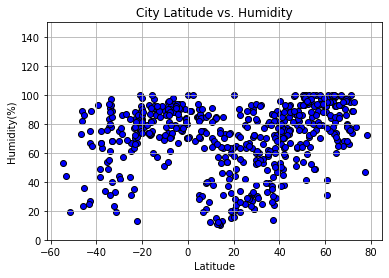

In [28]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Humidity"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.ylim(0, weather_data_df["Humidity"].max()+50)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude vs. Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

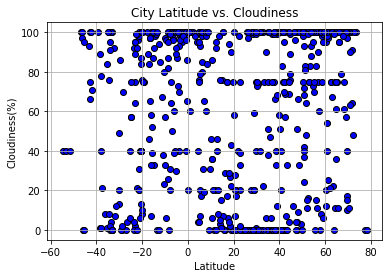

In [29]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Cloudiness"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs. Cloudiness")
plt.savefig("../output_data/Lat_vs_cloudiness_plot")
plt.show()

## Latitude vs. Wind Speed Plot

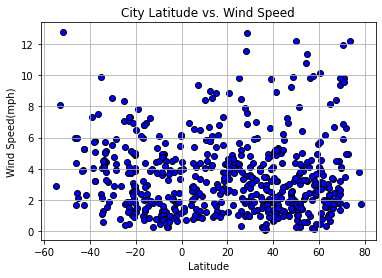

In [30]:
#Observation 2 - Most outliers in terms of Wind Speed are in places with extreme latitude, eg, -60 or 80

plt.scatter(weather_data_df["Latitude"], weather_data_df["Wind Speed"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"City Latitude vs. Wind Speed")
plt.savefig("../output_data/Lat_vs_windSpeed_plot")
plt.show()

## Linear Regression

In [34]:
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    if ylim is not None:
        plt.ylim(0, ylim)
        
    today_date = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {today_date}")
    plt.annotate(line_eq,line_placement,fontsize=15,color="green")
    
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    return plt.plot(x_values,regress_values,"r-")

In [35]:
northern_hemisphere = weather_data_df.loc[weather_data_df["Latitude"]>0]
southern_hemisphere = weather_data_df.loc[weather_data_df["Latitude"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7173229970109269
The correlation between both factors is -0.85


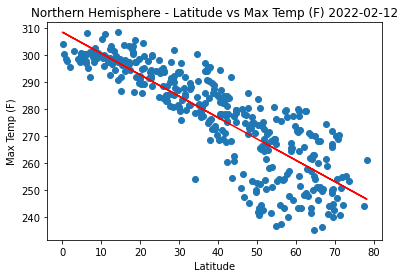

In [36]:
#print ("y =", slope, "x +", intercept)

x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Max Temp (F)", "Northern",(0, 0))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.22091129547471727
The correlation between both factors is 0.47


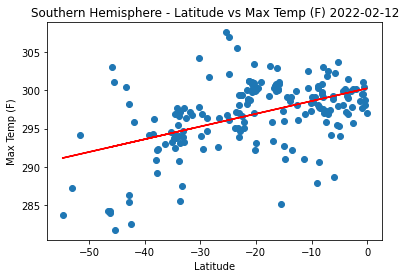

In [37]:
#plot.annotate
#y= slope * x + intercept
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Max Temp (F)", "Southern",(-30, 50))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.19254806371961553
The correlation between both factors is 0.44


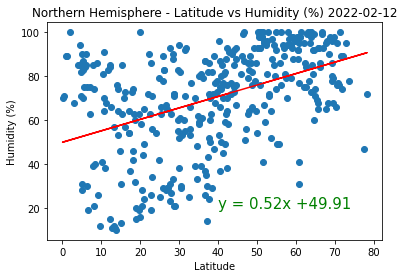

In [42]:
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(40, 20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.22187524320414154
The correlation between both factors is 0.47


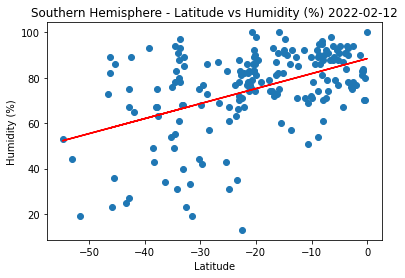

In [43]:
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(40, 20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.059175678248970624
The correlation between both factors is 0.24


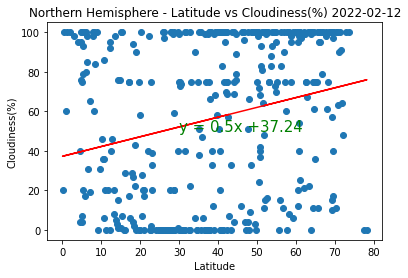

In [46]:
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Northern",(30, 50))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07819164331939782
The correlation between both factors is 0.28


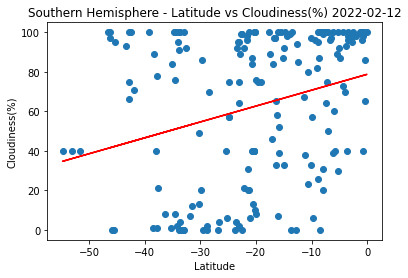

In [47]:
#Observation 3: In the southern hemisphere, there is a higher percentage of cloudiness in locations close to 0 latitude. As latitude decreases, so does cloudiness
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(30, 50))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 8.427449041132121e-07
The correlation between both factors is -0.0


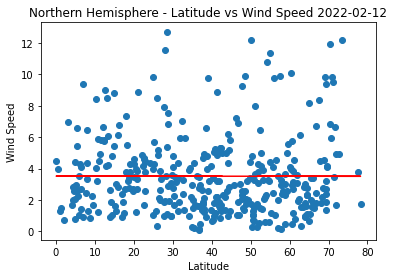

In [52]:
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed", "Northern",(20, 25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1041829862640915
The correlation between both factors is -0.32


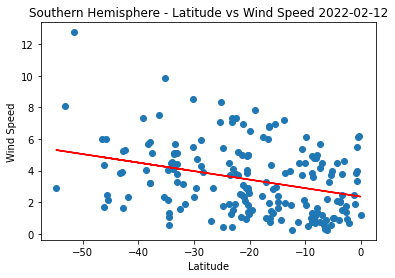

In [53]:
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed", "Southern",(20, 25))